In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
curr_exchange = pd.read_json('http://api.nbp.pl/api/exchangerates/rates/A/USD/2019-09-01/2019-09-30/')

In [3]:
def load_from_range(date_from, date_to, currency='USD'):
    """Ladownie danych dla wybranej waluty w wybranym zakresie dat
    :param date_from: poczatek zakresu
    :param date_to: koniec zakresu
    :param currency: wybrana waluta
    """
    data = pd.read_json(f'http://api.nbp.pl/api/exchangerates/rates/A/{currency}/{date_from}/{date_to}/')
    # wyciagniecie effective date do poziomu osobnej kolumny
    data['effectiveDate'] = data['rates'].map(lambda d: d['effectiveDate'])
    data['mid'] = data['rates'].map(lambda d: d['mid'])
    data.drop('rates', axis=1, inplace=True)
    # ustawienie indeksu df na effectiveDate
    data = data.set_index(['effectiveDate'])
    return data

In [4]:
# Ladowanie danych dla USD i CHF
usd = load_from_range('2019-09-01', '2019-09-30')
chf = load_from_range('2019-09-01', '2019-09-30', 'chf')
# Zmiana nazwy kolumny w celu pozniejszego mergowania DF
chf = chf.rename(columns={'mid': 'chf_mid'})
# Sklejanie
together = usd.merge(chf, left_index=True, right_index=True)

In [5]:
# Liczenie korelacji
print("Correlation")
print(np.corrcoef(together['mid'], together['chf_mid']))

Correlation
[[1.         0.93626615]
 [0.93626615 1.        ]]


Normal plot


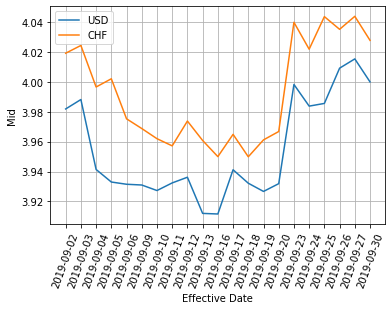

In [6]:
# Wykres bez uzycia subplots
print("Normal plot")

diag = together['mid']

diag2 = together['chf_mid']
plt.plot(diag, label='USD')
# Lekkie przekrecenie etykiet na osi X w celu lepszej czytelnosci wykresu
plt.tick_params(axis='x', rotation=70)
plt.xlabel('Effective Date')
plt.ylabel('Mid')

plt.plot(diag2, label='CHF')
plt.legend(loc='upper left')
# Wlaczenie siatki w celu umozliwienia dokladniejszego dopasowania danych
plt.grid(True)
plt.show()

Subplots


/home/malaskow/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


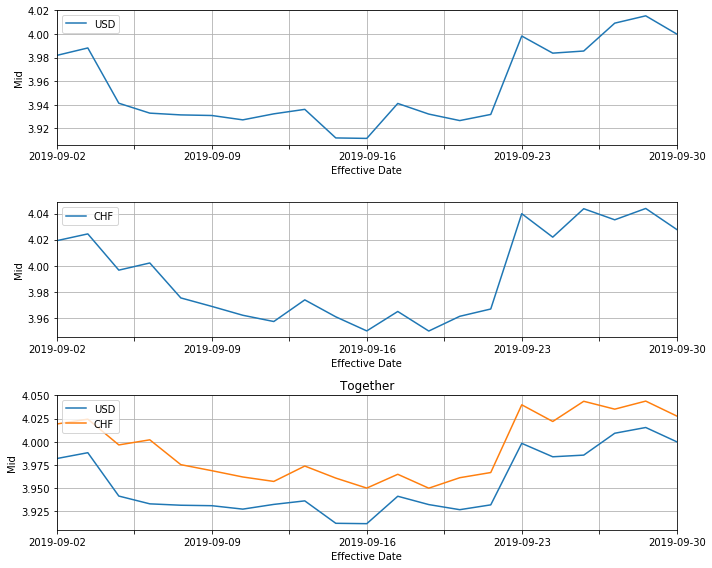

In [11]:
# Z uzyciem subplots
print("Subplots")
# 3 wiersze w 1 kolumnie
fig, ax = plt.subplots(3, 1, tight_layout=True, figsize=(10, 8))
# Rysowanie wykresow w oddzielnych wieszach
usd.plot(ax=ax[0])
chf.plot(ax=ax[1])
# Rysowanie wykresow we wspolnym wierszu
usd.plot(ax=ax[2])
chf.plot(ax=ax[2])

# Ustawianie opisow osi
for i in ax:
    i.set_xlabel('Effective Date')
    i.set_ylabel('Mid')
    i.grid(True)
# Ustawianie legendy na kazdym z wykresow
ax[0].legend(['USD'], loc='upper left')
ax[1].legend(['CHF'], loc='upper left')
ax[2].legend(['USD', 'CHF'], loc='upper left')

ax[2].set_title('Together')

fig.show()